In [1]:
# Title: Exercise 2.2
# Author: James Sneddon
# Date: 21 December 2025
# Modified By: James Sneddon
# Description: This program 
# filename: /Users/jamessneddon/Downloads/week3data/customer_spending.csv + /Users/jamessneddon/Downloads/week3data/us_pop_data.csv

In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pop_df = pd.read_csv('/Users/jamessneddon/Downloads/week3data/us_pop_data.csv')

In [6]:
pop_df.head()

,year,us_pop
0,1790,3929326
1,1800,5308483
2,1810,7239881
3,1820,9638453
4,1830,12866020


In [9]:
# years since 1790
pop_df['years_since_1790'] = pop_df['year'] - 1790

# pop in millions
pop_df['pop_in_millions'] = pop_df['us_pop'] / 1_000_000

In [10]:
pop_df.head()

,year,us_pop,years_since_1790,pop_in_millions
0,1790,3929326,0,3.929326
1,1800,5308483,10,5.308483
2,1810,7239881,20,7.239881
3,1820,9638453,30,9.638453
4,1830,12866020,40,12.866020


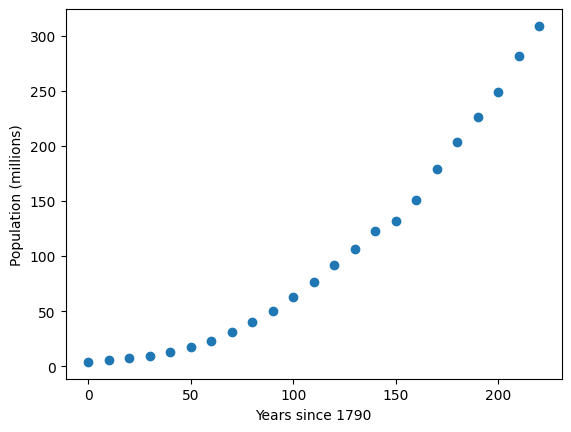

In [15]:
plt.scatter(pop_df['years_since_1790'], pop_df['pop_in_millions'])
plt.xlabel('Years since 1790')
plt.ylabel("Population (millions)")
plt.show()
# create scatterplot with labels

In [22]:
# create linear regresion with r^2
x = pop_df['years_since_1790'].to_numpy()
y = pop_df['pop_in_millions'].to_numpy()

m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

r = np.corrcoef(x, y)[0, 1]

r_squared = r ** 2

print("Slope:", m)
print("Intercept:", b)
print("r:", r)
print("R^2:", r_squared)

Slope: 1.3596248380434781
Intercept: -45.56787609782609
r: 0.9587719982915874
R^2: 0.9192437447080437


In [24]:
pop_df['years_since_1790_squared'] = pop_df['years_since_1790'] ** 2

In [25]:
# create second linear regresion with r^2
x = pop_df['years_since_1790_squared'].to_numpy()
y = pop_df['pop_in_millions'].to_numpy()

m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

r = np.corrcoef(x, y)[0, 1]

r_squared = r ** 2

print("Slope:", m)
print("Intercept:", b)
print("r:", r)
print("R^2:", r_squared)

Slope: 0.006220027007947028
Intercept: 1.3604104558306371
r: 0.9992455001142935
R^2: 0.9984915694986645


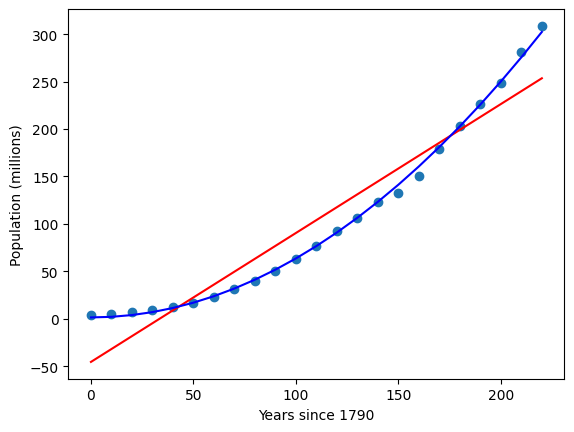

In [34]:
# plot both graphs
x1 = pop_df['years_since_1790'].to_numpy()
x2 = pop_df['years_since_1790_squared'].to_numpy()
y = pop_df['pop_in_millions'].to_numpy()

# linear regression on x1
m, b = np.polyfit(x1, y, 1)
y_pred = m * x1 + b

# linear regression on x2
m, b = np.polyfit(x2, y, 1)
y_pred2 = m * x2 + b

# scatterplot with labels
plt.scatter(pop_df['years_since_1790'], pop_df['pop_in_millions'])
plt.plot(x1, y_pred, color='red')
plt.plot(x1, y_pred2, color='blue')
plt.xlabel('Years since 1790')
plt.ylabel("Population (millions)")
plt.show()

In [35]:
#f) The quadratic equation is a better fit, yes this can also be seen in the r^2 values: the quadratic equation has a value of .998 compared to .919 of the linear equation.

In [36]:
# customer spending 

In [38]:
df_cspend = pd.read_csv('/Users/jamessneddon/Downloads/week3data/customer_spending.csv')

In [44]:
df_cspend.count()

ann_spending    440
dtype: int64

In [52]:
#determine bin sizes
math.sqrt(440)

20.97617696340303

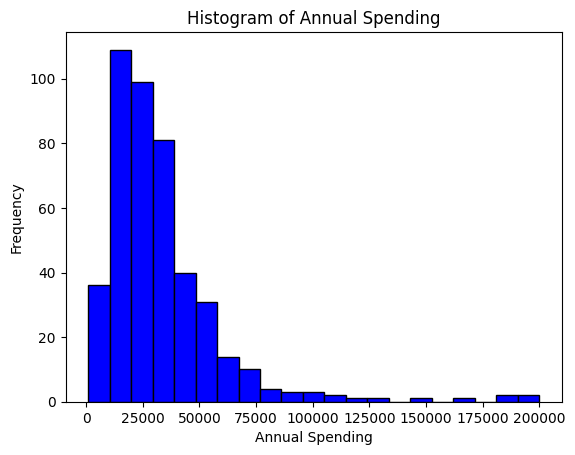

In [53]:
# create histogram
plt.hist(df_cspend['ann_spending'], bins = 21, color='blue', edgecolor='black')
plt.xlabel('Annual Spending')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Spending')
plt.show()

In [70]:
# Create new log transformation dataset
cspend_log_df = np.log(df_cspend['ann_spending'])

In [71]:
cspend_log_df.head()

0    10.437405
1    10.412291
2    10.508077
3    10.217605
4    10.738568
Name: ann_spending, dtype: float64

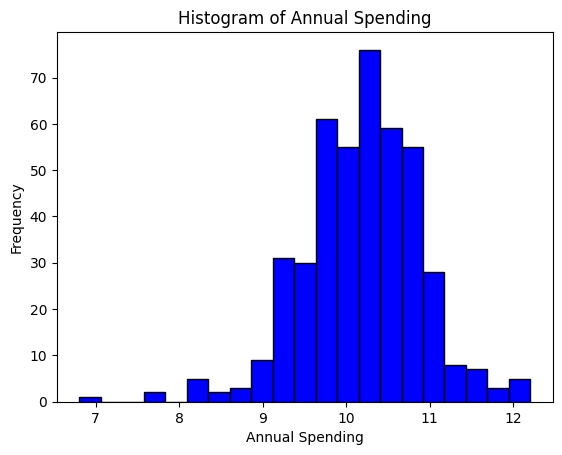

In [72]:
#create historgram for log transfomation  
plt.hist(cspend_log_df, bins = 21, color='blue', edgecolor='black')
plt.xlabel('Annual Spending')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Spending')
plt.show()

In [73]:
# ("d.) There is a significant number of outliers and variance skewing the untrasnformed dataset to the right, after applying the log transformation, it becomes easier to see the trends in the population.